## Pre-process the Data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
pip install apyori

In [11]:
from apyori import apriori

In [12]:
store_data = pd.read_excel("Online retail.xlsx", header=None)
display(store_data.head())
print(store_data.shape)

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


(7501, 1)


In [13]:
#Here we need a data in form of list for Apriori Algorithm.

records = []
for i in range(1, 7501):
    records.append([str(store_data.values[i, j]) for j in range(0, 1)])

In [14]:
records

[['burgers,meatballs,eggs'],
 ['chutney'],
 ['turkey,avocado'],
 ['mineral water,milk,energy bar,whole wheat rice,green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta,french fries'],
 ['soup,light cream,shallot'],
 ['frozen vegetables,spaghetti,green tea'],
 ['french fries'],
 ['eggs,pet food'],
 ['cookies'],
 ['turkey,burgers,mineral water,eggs,cooking oil'],
 ['spaghetti,champagne,cookies'],
 ['mineral water,salmon'],
 ['mineral water'],
 ['shrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt'],
 ['turkey,eggs'],
 ['turkey,fresh tuna,tomatoes,spaghetti,mineral water,black tea,salmon,eggs,chicken,extra dark chocolate'],
 ['meatballs,milk,honey,french fries,protein bar'],
 ['red wine,shrimp,pasta,pepper,eggs,chocolate,shampoo'],
 ['rice,sparkling water'],
 ['spaghetti,mineral water,ham,body spray,pancakes,green tea'],
 ['burgers,grated cheese,shrimp,pasta,avocado,honey,white wine,toothpaste'],
 ['eggs'],
 ['parmesan cheese,spaghetti,soup,avocado,milk,fresh bread'],
 ['ground

In [15]:
print(type(records))

<class 'list'>


In [37]:
# View top sold items

total_item_count = sum(store_data.sum())
print("Total Item : ", total_item_count)
print()
item_summary = store_data.sum().sort_values(ascending = False).reset_index()
item_summary.rename(columns={item_summary.columns[0]:'item_name',item_summary.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(item_summary.head())

Total Item :  29358

Item Summary:
       item_name  item_count
0  mineral water        1788
1           eggs        1348
2      spaghetti        1306
3   french fries        1282
4      chocolate        1229


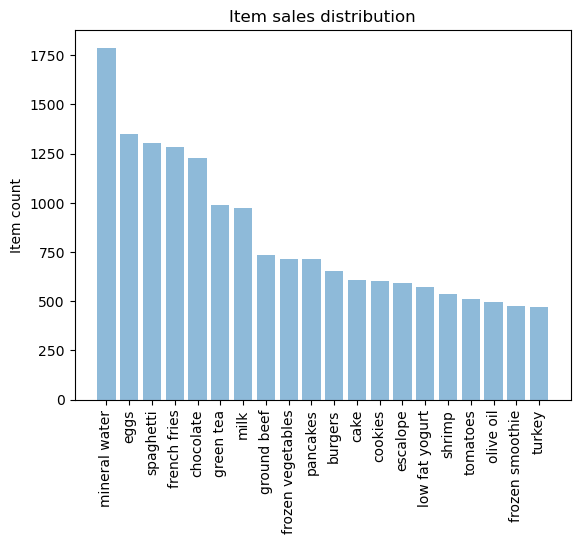

In [38]:
# Visualize top sold items

objects = (list(item_summary['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary['item_count'].head(n=20))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')
plt.show()

In [18]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [19]:
store_data.columns = ['Transaction']

In [20]:
# Transform the data into a list of lists
transactions = store_data['Transaction'].apply(lambda x: x.split(','))

In [21]:
transactions

0       [shrimp, almonds, avocado, vegetables mix, gre...
1                              [burgers, meatballs, eggs]
2                                               [chutney]
3                                       [turkey, avocado]
4       [mineral water, milk, energy bar, whole wheat ...
                              ...                        
7496                    [butter, light mayo, fresh bread]
7497    [burgers, frozen vegetables, eggs, french frie...
7498                                            [chicken]
7499                                [escalope, green tea]
7500    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: Transaction, Length: 7501, dtype: object

In [22]:
transactions.head()

0    [shrimp, almonds, avocado, vegetables mix, gre...
1                           [burgers, meatballs, eggs]
2                                            [chutney]
3                                    [turkey, avocado]
4    [mineral water, milk, energy bar, whole wheat ...
Name: Transaction, dtype: object

## Association Rule Mining -

In [23]:
!pip install mlxtend

In [24]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
# Initialize the transaction encoder
te = TransactionEncoder()

# Fit and transform the transaction data
te_ary = te.fit(transactions).transform(transactions)

# Convert the transaction data to a DataFrame
store_data = pd.DataFrame(te_ary, columns=te.columns_)

In [26]:
te

TransactionEncoder()

In [27]:
te_ary

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [28]:
store_data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(store_data, min_support=0.01, use_colnames=True)

In [30]:
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(milk, mineral water, ground beef)"
253,0.017064,"(mineral water, spaghetti, ground beef)"
254,0.015731,"(milk, mineral water, spaghetti)"
255,0.010265,"(mineral water, spaghetti, olive oil)"


In [31]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [32]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630
1,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
3,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933,0.194767
...,...,...,...,...,...,...,...,...,...,...
401,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452
402,"(mineral water, spaghetti)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933,0.536902
403,(pancakes),"(mineral water, spaghetti)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244,0.557862
404,(mineral water),"(pancakes, spaghetti)",0.238368,0.025197,0.011465,0.048098,1.908923,0.005459,1.024059,0.625163


In [33]:
# Display the first few rules
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630
1,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
3,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933,0.194767


## Analysis and Interpretation

In [34]:
# Filter the rules based on support, confidence, and lift
rules = rules[(rules['support'] >= 0.01) & (rules['confidence'] >= 0.5) & (rules['lift'] >= 1)]

In [35]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
344,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
377,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969


In [36]:
# Sort the rules by confidence in descending order
rules = rules.sort_values('confidence', ascending=False)
# Display the first few rules
rules.head()

# Interpret the results
for index, rule in rules.iterrows():
    print(f"Rule: {rule['antecedents']} -> {rule['consequents']}")
    print(f"Support: {rule['support']}")
    print(f"Confidence: {rule['confidence']}")
    print(f"Lift: {rule['lift']}")
    print("====================================")

Rule: frozenset({'eggs', 'ground beef'}) -> frozenset({'mineral water'})
Support: 0.010131982402346354
Confidence: 0.5066666666666667
Lift: 2.125563012677107
Rule: frozenset({'milk', 'ground beef'}) -> frozenset({'mineral water'})
Support: 0.011065191307825623
Confidence: 0.503030303030303
Lift: 2.1103077757440176


## Interview Questions:

## 1.	What is lift and why is it important in Association rules?
Lift measures how much more likely two items are to occur together compared to their independent occurrences.

Lift > 1: Positive association (items are bought together more than by chance).
Lift = 1: No association (items occur independently).
Lift < 1: Negative association (items reduce each other's likelihood).
It's important because it identifies strong, meaningful associations by adjusting for the frequency of individual items, helping in tasks like market basket analysis for better decision-making.

## 2.	What is support and Confidence. How do you calculate them?
## 1.Support
   Support is a measure of how frequently an itemset appears in the dataset. It tells us the proportion of transactions in which    a certain item or itemset occurs.

   Formula:

   Support(A)=Number of transactions containing 𝐴 / Total number of transactions

## 2. Confidence
   Confidence measures how often the rule 𝐴→𝐵  (if 𝐴 occurs, then 𝐵 occurs) holds true.It reflects the likelihood of 𝐵       occurring given that A has occurred.
   Confidence is how likely item 𝐵 is to appear when item A is present.

   Formula:

   Confidence(A→𝐵)=Support(A and B) / Support(A)

## 3.	What are some limitations or challenges of Association rules mining?
Limitations of Association Rule Mining:

High computational cost: Time-consuming for large datasets.
    
Too many rules: Can lead to information overload.
    
Low interpretability: Some rules may lack practical significance.
    
Rare item problem: Often misses important infrequent patterns.
    
Setting thresholds: Difficult to determine optimal support and confidence levels.
    
Ignoring sequential patterns: Doesn't consider the order of item occurrence.
    
Correlation vs. causation: Identifies co-occurrence without implying causality.